# **XGBoost**

**XGBoost** is a powerful machine learning algorithm that has been dominating the world of data science in recent years.

1. XGBoost, short for Extreme Gradient Boosting, is widely used for both classification and regression tasks. 

2. It is particularly well-suited for structured/tabular data like the data you'd encounter in finance, marketing, or retail sales.

3. At the heart of XGBoost are decision trees, which you already met during Basic ML course. This is a type of model that splits the data into "branches" based on questions about the features.

4. XGBoost works by training a number of decision trees. Each tree is trained on a subset of the data, and the predictions from each tree are combined to form the final prediction.

**Why is XGBoost So Popular?**

1. Accuracy: XGBoost is known for providing very accurate predictions, which is why it is often used in data science competitions and real-world applications.

2. Speed: XGBoost is optimized for speed and performance, using techniques like parallel processing to train models much faster than other boosting algorithms.

3. Handles Missing Data: XGBoost is good at dealing with missing data. It can handle missing values naturally without needing to fill or remove them beforehand.

4. Feature Importance: It automatically identifies the most important features in your dataset. This can give you insights into which factors are driving predictions.

5. Flexibility: XGBoost can be used for both classification (e.g., predicting whether a customer will buy a product or not) and regression tasks (e.g., predicting a numerical value like sales).

6. Overfitting Control : XGBoost has built-in techniques (like regularization) to prevent overfitting, which happens when the model memorizes the training data but doesn’t generalize well to new data.


# **Import Libraries**

In [2]:
# Install missing packages
#%pip install pandas seaborn statsmodels scikit-learn
#%pip install xgboost
#%pip install numpy


# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# Stats & Time Series (optional for decomposition/stationarity testing)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Scikit-learn: Models, Metrics, Scaling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV,RandomizedSearchCV

# **Import Data**

In [8]:
# setting the file path - locally.
file_path = './data_store_sales/'
# Load the merged files into pandas DataFrames
df_train= pd.read_csv(file_path+'feature_eng_upto_2014.csv')

In [20]:
df_train.head(10)

,store_nbr,item_nbr,date,unit_sales,onpromotion,outlier,dcoilwtico,is_holiday,is_event,dayofweek,...,promo_last_week,oil_price_lag_3,oil_price_change,next_is_holiday,next_is_event,outlier_lag_1,outlier_lag_7,outlier_lag_14,outlier_lag_30,outlier_rolling_mean_7
0,24,96995,2013-01-02,0.0,0,0,93.140000,0,0,2,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,24,96995,2013-01-03,0.0,0,0,92.970000,0,0,3,...,NaN,NaN,-0.001825,0,0,0.0,NaN,NaN,NaN,NaN
2,24,96995,2013-01-04,0.0,0,0,93.120000,0,0,4,...,NaN,NaN,0.001613,0,0,0.0,NaN,NaN,NaN,NaN
3,24,96995,2013-01-05,0.0,0,0,93.146667,0,0,5,...,NaN,93.140000,0.000286,0,0,0.0,NaN,NaN,NaN,NaN
4,24,96995,2013-01-06,0.0,0,0,93.173333,0,0,6,...,NaN,92.970000,0.000286,0,0,0.0,NaN,NaN,NaN,NaN
5,24,96995,2013-01-07,0.0,0,0,93.200000,0,0,0,...,NaN,93.120000,0.000286,0,0,0.0,NaN,NaN,NaN,NaN
6,24,96995,2013-01-08,0.0,0,0,93.210000,0,0,1,...,NaN,93.146667,0.000107,0,0,0.0,NaN,NaN,NaN,NaN
7,24,96995,2013-01-09,2.0,0,0,93.080000,0,0,2,...,0.0,93.173333,-0.001395,0,0,0.0,0.0,NaN,NaN,0.0
8,24,96995,2013-01-10,0.0,0,0,93.810000,0,0,3,...,0.0,93.200000,0.007843,0,0,0.0,0.0,NaN,NaN,0.0
9,24,96995,2013-01-11,0.0,0,0,93.600000,0,0,4,...,0.0,93.210000,-0.002239,0,0,0.0,0.0,NaN,NaN,0.0


In [4]:
df_train.info() # 9437752 rows, 44 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437752 entries, 0 to 9437751
Data columns (total 44 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   store_nbr               int64  
 1   item_nbr                int64  
 2   date                    object 
 3   unit_sales              float64
 4   onpromotion             int64  
 5   outlier                 int64  
 6   dcoilwtico              float64
 7   is_holiday              int64  
 8   is_event                int64  
 9   dayofweek               int64  
 10  is_weekend              int64  
 11  month                   int64  
 12  day                     int64  
 13  weekofyear              int64  
 14  year                    int64  
 15  is_month_start          int64  
 16  is_month_end            int64  
 17  lag_1                   float64
 18  lag_7                   float64
 19  lag_14                  float64
 20  lag_30                  float64
 21  lag_60                  float64

In [6]:
print(df_train['store_nbr'].dtypes)
print(df_train['item_nbr'].dtypes)

category
category


In [22]:
df_train['date'].min(), df_train['date'].max()

('2013-01-02', '2014-03-31')

In [23]:
# Check if the dataframe is grouped by store_nbr and item_nbr
is_grouped = df_train.sort_values(['store_nbr', 'item_nbr']).equals(df_train)
print(f"Is df_train grouped by store_nbr and item_nbr? {is_grouped}")

Is df_train grouped by store_nbr and item_nbr? True


In [24]:
is_grouped_by_all = df_train.sort_values(['store_nbr', 'item_nbr', 'date']).equals(df_train)
print(f"Is df_train grouped by store_nbr, item_nbr, and date? {is_grouped_by_all}")

Is df_train grouped by store_nbr, item_nbr, and date? True


In [25]:
df_train.isnull().sum()

store_nbr                       0
item_nbr                        0
date                            0
unit_sales                      0
onpromotion                     0
outlier                         0
dcoilwtico                      0
is_holiday                      0
is_event                        0
dayofweek                       0
is_weekend                      0
month                           0
day                             0
weekofyear                      0
year                            0
is_month_start                  0
is_month_end                    0
lag_1                       20788
lag_7                      145516
lag_14                     291032
lag_30                     623640
lag_60                    1247280
rolling_mean_7             145516
rolling_std_7              145516
rolling_mean_14            291032
rolling_std_14             291032
rolling_mean_30            623640
rolling_std_30             623640
ewm_mean_7                  20788
ewm_std_7     

In [7]:
df_train['unit_sales'].describe()

count    9.437752e+06
mean     2.070799e+00
std      8.254941e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.935000e+03
Name: unit_sales, dtype: float64

In [ ]:
#df_train.shape

(8190472, 44)

In [14]:
df_train.drop_duplicates(inplace=True)

In [31]:
print(df_train.columns.tolist())

['store_nbr', 'item_nbr', 'date', 'unit_sales', 'onpromotion', 'outlier', 'dcoilwtico', 'is_holiday', 'is_event', 'dayofweek', 'is_weekend', 'month', 'day', 'weekofyear', 'year', 'is_month_start', 'is_month_end', 'lag_1', 'lag_7', 'lag_14', 'lag_30', 'lag_60', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14', 'rolling_std_14', 'rolling_mean_30', 'rolling_std_30', 'ewm_mean_7', 'ewm_std_7', 'ewm_mean_14', 'ewm_std_14', 'ewm_mean_30', 'ewm_std_30', 'promo_last_week', 'oil_price_lag_3', 'oil_price_change', 'next_is_holiday', 'next_is_event', 'outlier_lag_1', 'outlier_lag_7', 'outlier_lag_14', 'outlier_lag_30', 'outlier_rolling_mean_7']


# **Correlation of Features with Unit Sales**

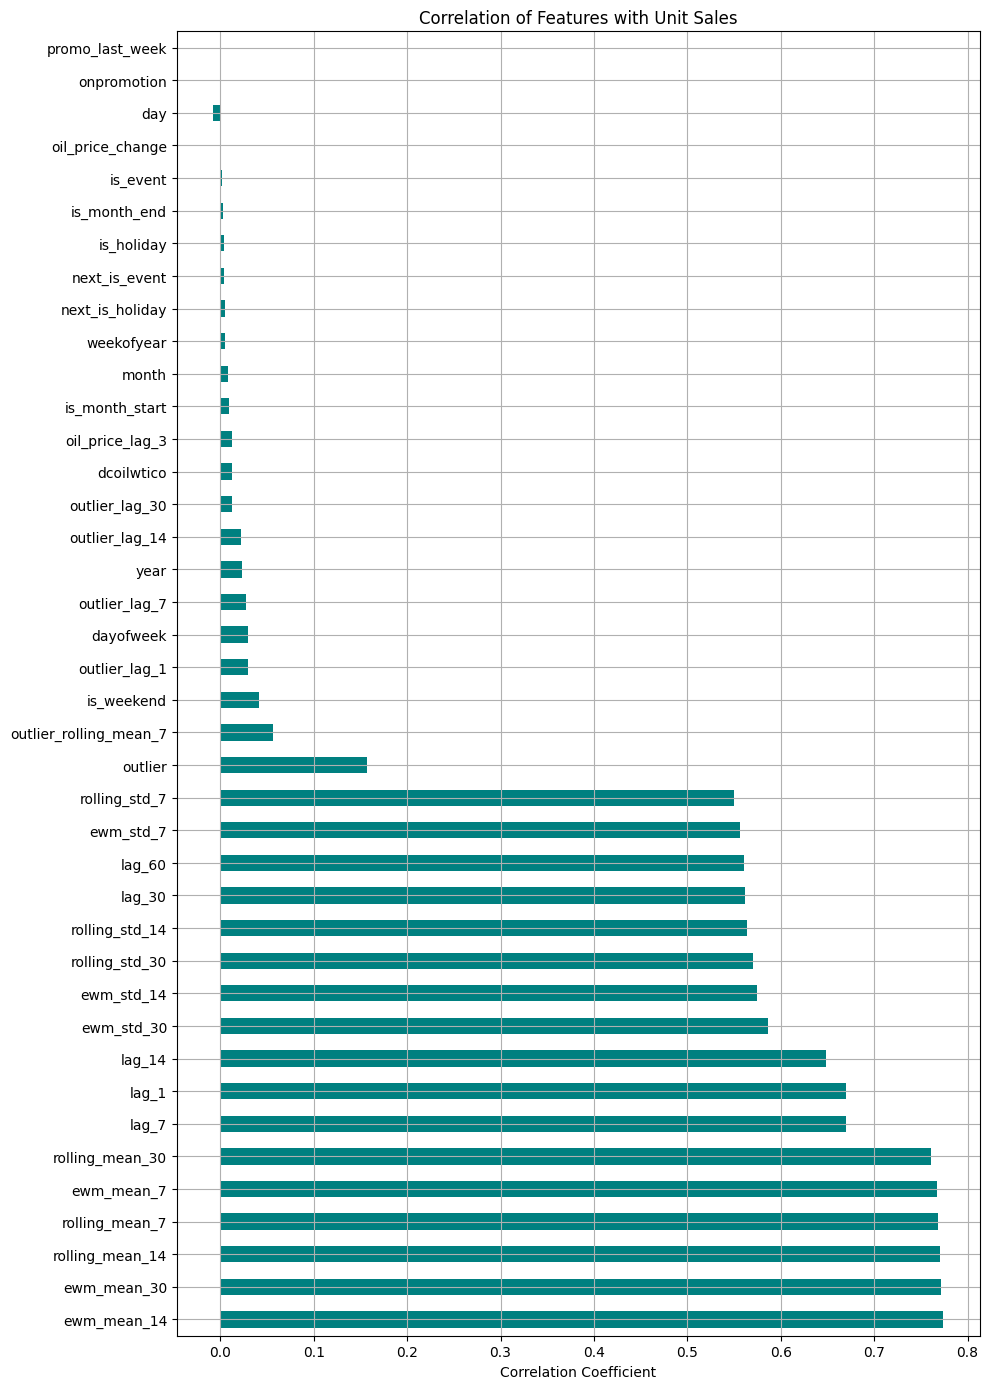

In [4]:
# Exclude specific columns
excluded_columns = ['date', 'store_nbr', 'item_nbr', 'unit_sales']
correlation_columns = [col for col in df_train.columns if col not in excluded_columns]

# Compute correlation
correlation = df_train[correlation_columns + ['unit_sales']].corr()['unit_sales'].drop('unit_sales')

# Plot correlation
plt.figure(figsize=(10, len(correlation) * 0.3 + 2))
correlation.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title("Correlation of Features with Unit Sales")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
df_train['unit_sales'].describe()

count    8.190472e+06
mean     2.137629e+00
std      8.473249e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.935000e+03
Name: unit_sales, dtype: float64

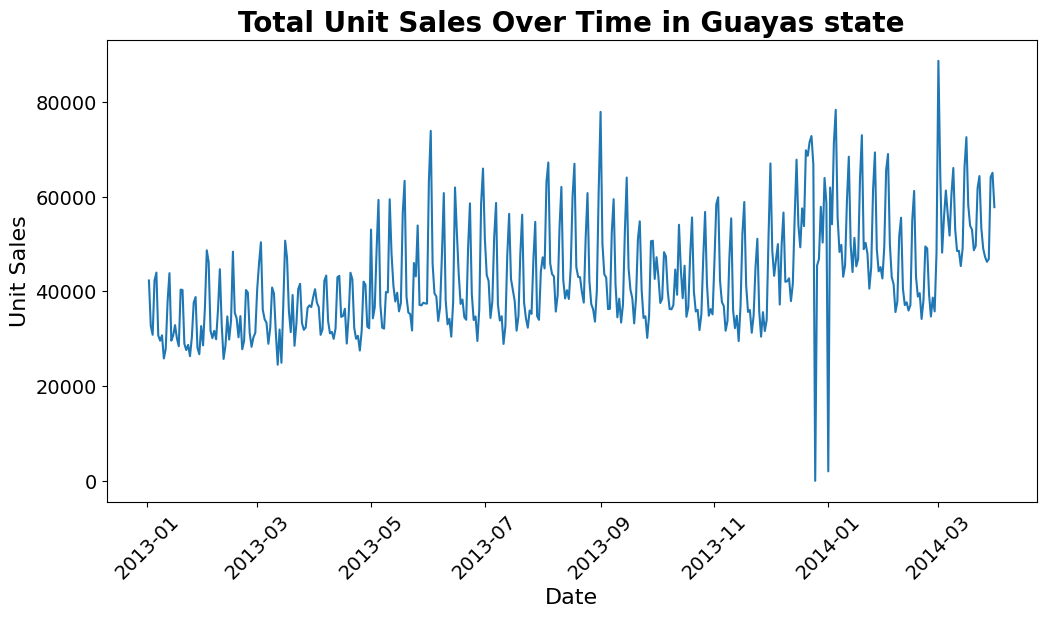

In [9]:
# Aggregating total sales by date
df_train['date'] = pd.to_datetime(df_train['date'])
sales_by_date = df_train.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas state', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

In [15]:
df_train.head(5)

,store_nbr,item_nbr,date,unit_sales,onpromotion,outlier,dcoilwtico,is_holiday,is_event,dayofweek,...,promo_last_week,oil_price_lag_3,oil_price_change,next_is_holiday,next_is_event,outlier_lag_1,outlier_lag_7,outlier_lag_14,outlier_lag_30,outlier_rolling_mean_7
0,24,96995,2013-01-02,0.0,0,0,93.140000,0,0,2,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,24,96995,2013-01-03,0.0,0,0,92.970000,0,0,3,...,NaN,NaN,-0.001825,0,0,0.0,NaN,NaN,NaN,NaN
2,24,96995,2013-01-04,0.0,0,0,93.120000,0,0,4,...,NaN,NaN,0.001613,0,0,0.0,NaN,NaN,NaN,NaN
3,24,96995,2013-01-05,0.0,0,0,93.146667,0,0,5,...,NaN,93.14,0.000286,0,0,0.0,NaN,NaN,NaN,NaN
4,24,96995,2013-01-06,0.0,0,0,93.173333,0,0,6,...,NaN,92.97,0.000286,0,0,0.0,NaN,NaN,NaN,NaN


# **Baseline Model (XGBoost)**

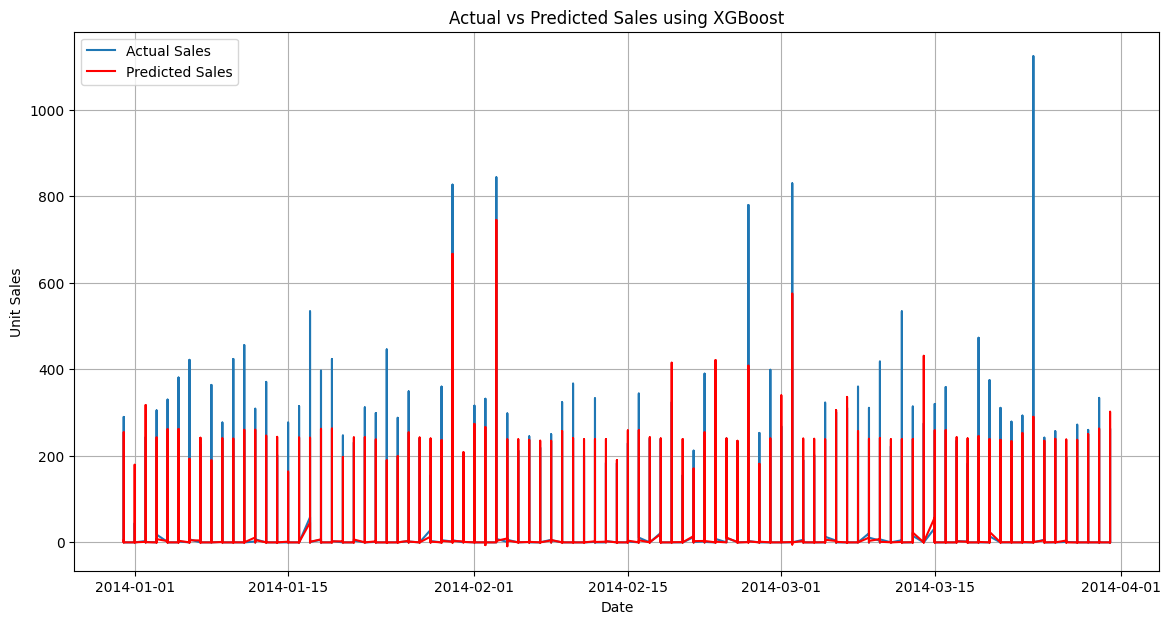

In [9]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Ensure date is datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Set date as index
df_train = df_train.set_index('date').sort_index()

# Define target variable and features
X = df_train.drop('unit_sales', axis=1)
y = df_train['unit_sales']

# Split into train and test (no shuffling to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train XGBoost regressor
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1
)
xgboost_model.fit(X_train, y_train)

# Predict
y_pred = xgboost_model.predict(X_test)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Sales')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales using XGBoost')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend()
plt.grid(True)
plt.show()

# **Visualization Graph from Baseline Model**

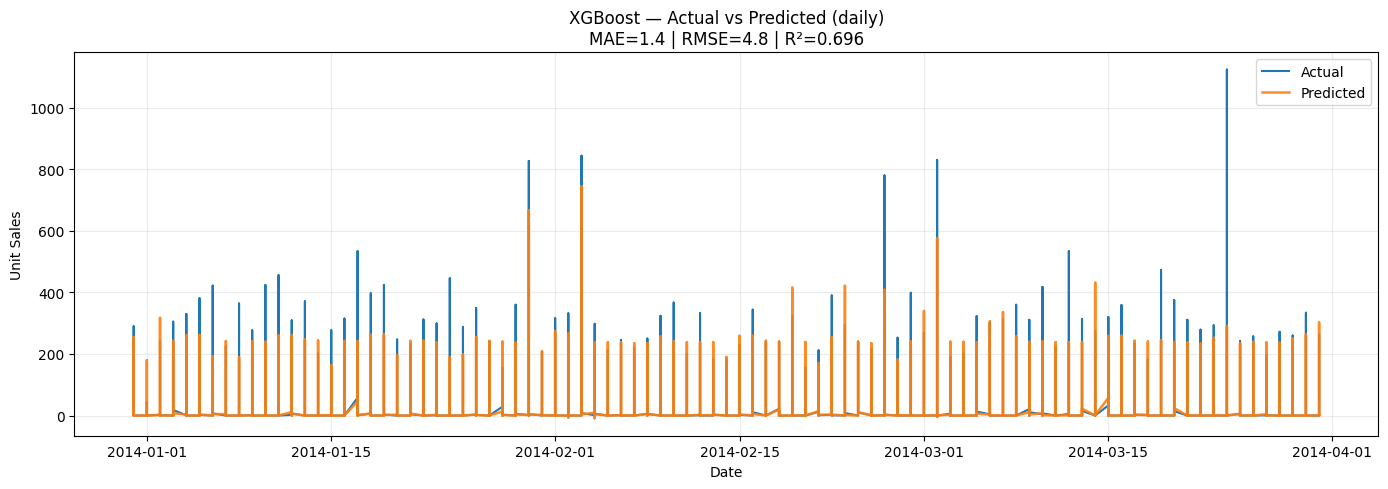

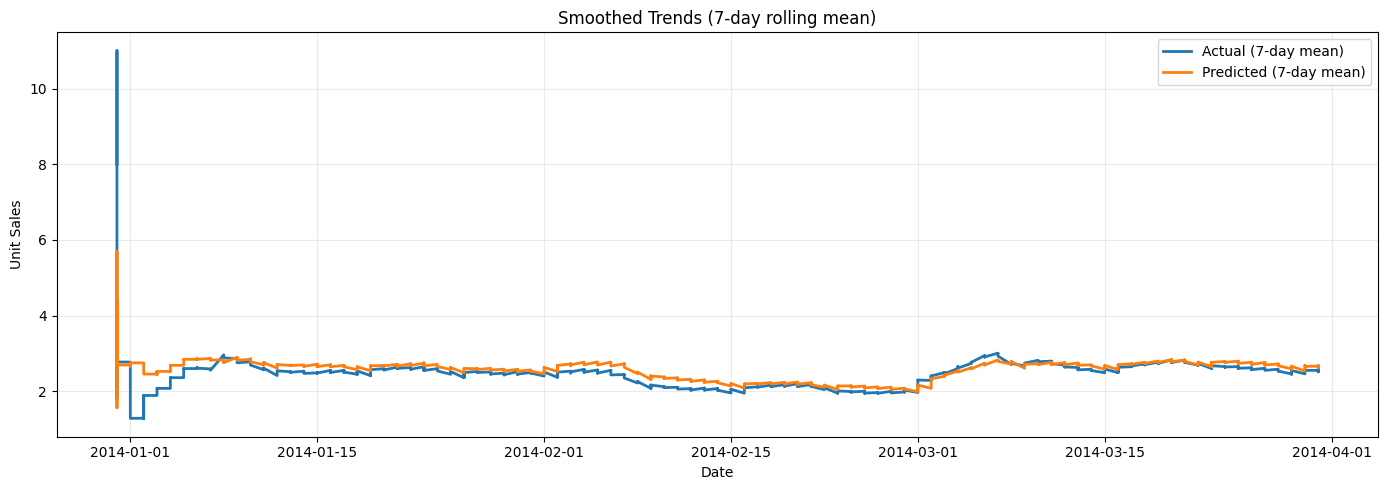

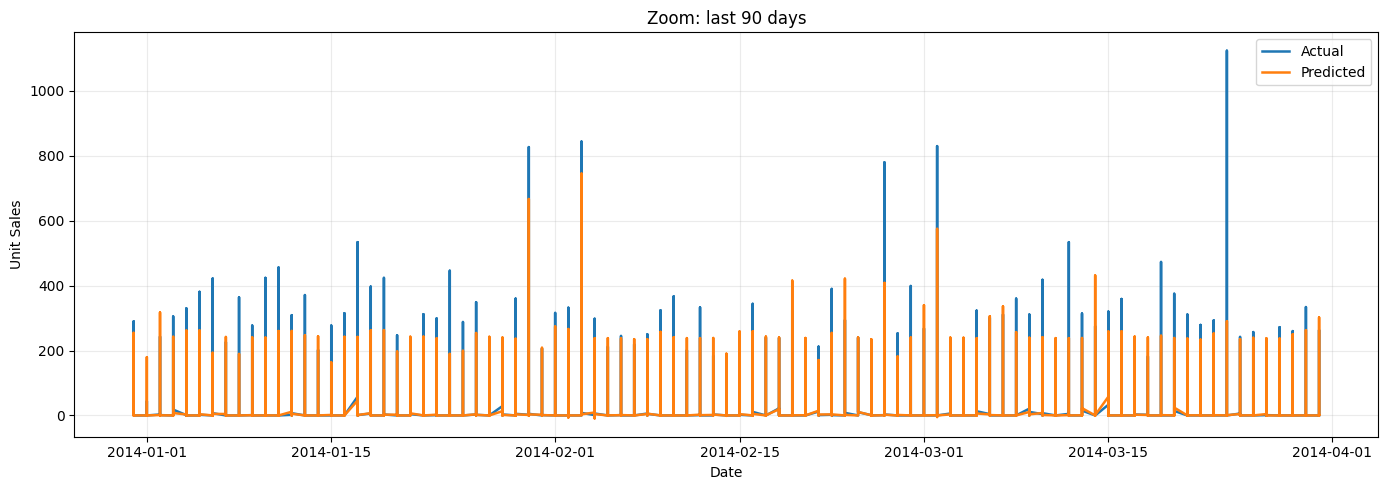

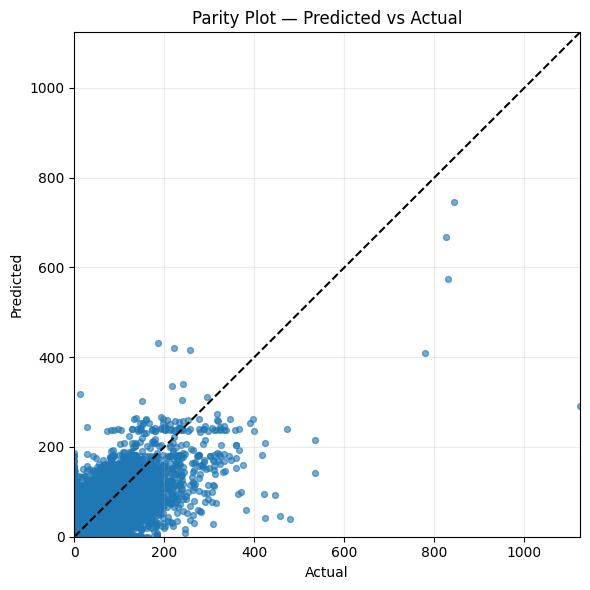

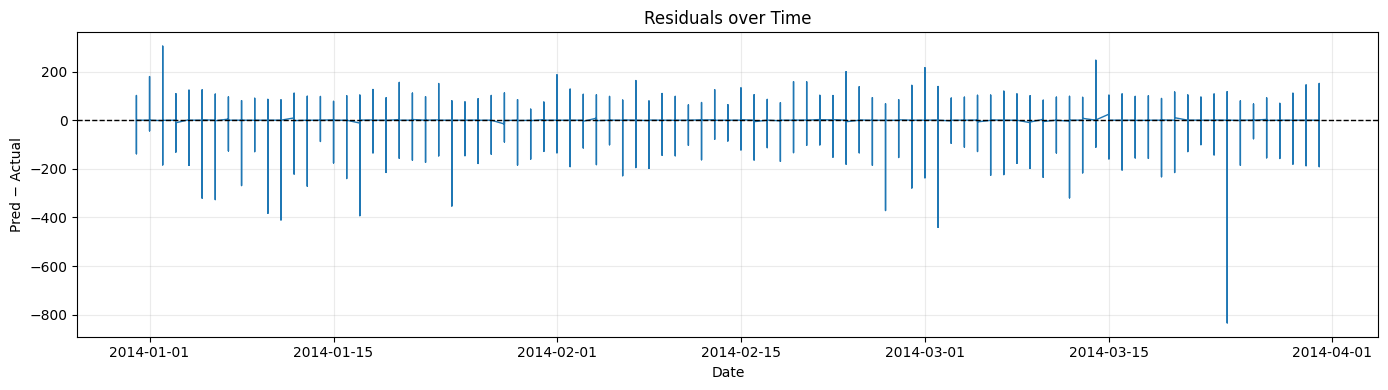

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- Metrics (nice to annotate on the plots) ----------
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

# Make a DataFrame for convenience
dfp = pd.DataFrame(
    {"actual": y_test.values, "pred": y_pred},
    index=pd.to_datetime(y_test.index)
).sort_index()

# Optional smoothing to de-noise (weekly rolling mean)
dfp_sm = dfp.rolling("7D").mean()

# ---------- 1) Clean time-series lines ----------
plt.figure(figsize=(14,5))
plt.plot(dfp.index, dfp["actual"], label="Actual", linewidth=1.5)
plt.plot(dfp.index, dfp["pred"],   label="Predicted", linewidth=1.8, alpha=0.9)
plt.title(f"XGBoost — Actual vs Predicted (daily)\nMAE={mae:.1f} | RMSE={rmse:.1f} | R²={r2:.3f}")
plt.xlabel("Date"); plt.ylabel("Unit Sales")
plt.grid(True, alpha=0.25); plt.legend()
plt.tight_layout(); plt.show()

# ---------- 2) Smoothed view (weekly rolling mean) ----------
plt.figure(figsize=(14,5))
plt.plot(dfp_sm.index, dfp_sm["actual"], label="Actual (7-day mean)", linewidth=2)
plt.plot(dfp_sm.index, dfp_sm["pred"],   label="Predicted (7-day mean)", linewidth=2)
plt.title("Smoothed Trends (7-day rolling mean)")
plt.xlabel("Date"); plt.ylabel("Unit Sales")
plt.grid(True, alpha=0.25); plt.legend()
plt.tight_layout(); plt.show()

# ---------- 3) Zoom last 90 days ----------
zoom_start = dfp.index.max() - pd.Timedelta(days=90)
dfz = dfp.loc[zoom_start:]
plt.figure(figsize=(14,5))
plt.plot(dfz.index, dfz["actual"], label="Actual", linewidth=1.8)
plt.plot(dfz.index, dfz["pred"],   label="Predicted", linewidth=1.8)
plt.title("Zoom: last 90 days")
plt.xlabel("Date"); plt.ylabel("Unit Sales")
plt.grid(True, alpha=0.25); plt.legend()
plt.tight_layout(); plt.show()

# ---------- 4) Parity plot (ŷ vs y) ----------
lims = [0, max(dfp.values.max(), 1)]  # simple limits
plt.figure(figsize=(6,6))
plt.scatter(dfp["actual"], dfp["pred"], s=18, alpha=0.6)
plt.plot(lims, lims, "k--", lw=1.5)
plt.xlim(lims); plt.ylim(lims)
plt.title("Parity Plot — Predicted vs Actual")
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.grid(True, alpha=0.25)
plt.tight_layout(); plt.show()

# ---------- 5) Residuals over time ----------
resid = dfp["pred"] - dfp["actual"]
plt.figure(figsize=(14,4))
plt.plot(dfp.index, resid, linewidth=1)
plt.axhline(0, color="k", ls="--", lw=1)
plt.title("Residuals over Time")
plt.xlabel("Date"); plt.ylabel("Pred − Actual")
plt.grid(True, alpha=0.25)
plt.tight_layout(); plt.show()

In [11]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, y_train=None):
    # Convert to numpy
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Core metrics
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    
    # MAPE (ignore zero-actual days)
    mask_nonzero = y_true != 0
    mape  = np.mean(np.abs((y_true[mask_nonzero] - y_pred[mask_nonzero]) / y_true[mask_nonzero])) * 100
    
    # sMAPE
    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-9))
    
    # MASE (needs in-sample naive forecast error)
    mase = None
    if y_train is not None:
        naive_forecast = np.roll(y_train, 1)[1:]  # shift by 1
        mae_naive = np.mean(np.abs(y_train[1:] - naive_forecast))
        mase = mae / mae_naive if mae_naive != 0 else np.nan
    
    # Print results
    print("=== Regression Metrics ===")
    print(f"MAE   : {mae:.3f}")
    print(f"RMSE  : {rmse:.3f}")
    print(f"R²    : {r2:.3f}")
    print(f"MAPE  : {mape:.2f}%")
    print(f"sMAPE : {smape:.2f}%")
    if mase is not None:
        print(f"MASE  : {mase:.3f}")
    
    return {
        "MAE": mae, "RMSE": rmse, "R2": r2,
        "MAPE": mape, "sMAPE": smape, "MASE": mase
    }

# Example usage:
regression_metrics(y_test, y_pred, y_train)  # y_train optional, for MASE

=== Regression Metrics ===
MAE   : 1.437
RMSE  : 4.792
R²    : 0.696
MAPE  : 69.55%
sMAPE : 151.28%
MASE  : 0.413


{'MAE': 1.437076341794272,
 'RMSE': np.float64(4.792166014638865),
 'R2': 0.6958508546978488,
 'MAPE': np.float64(69.5450950308083),
 'sMAPE': np.float64(151.27556451286125),
 'MASE': np.float64(0.4129128036605621)}

**The aseline XGBoost model shows some strengths but also clear weaknesses:**

**1. Performance Metrics**

•	MAE (1.44) and MASE (0.41) → good relative to a naïve forecast; model is better than persistence.

•	RMSE (4.79) → quite high, showing that large spikes are poorly predicted.

•	R² (0.696) → explains ~70% of the variance, solid for a first pass.

•	MAPE (69.55%) & sMAPE (151.28%) → high, suggesting percentage-based accuracy is poor, likely due to many small actual sales values where even small absolute errors become large percentage errors.

**2. Visual Insights**

•	Daily plot → The model captures overall patterns but underestimates peaks and overestimates troughs.

•	Smoothed 7-day trend → Good alignment with actual sales; the model tracks seasonality/trend reasonably well at an aggregated level.

•	Zoom (last 90 days) → Same issue: peaks missed, flat sales predicted where spikes occur.

•	Parity plot → Predictions are clustered at mid-range values (underfitting extremes), with noticeable underprediction for high-sales days.

•	Residuals plot → Residuals are mostly negative for large sales spikes, confirming systematic underestimation of high demand days.

**3. Business Context**

If this is retail demand forecasting:

•	The model is reliable for stable days but unreliable for promotions or special events (where demand spikes).

•	In practice, this means stock levels could be underestimated during peak periods → risk of stockouts.

•	Overprediction in low-demand periods could cause overstock and holding costs.

**4. Recommendations**

•	Tune hyperparameters: Use GridSearchCV or Optuna to find better max_depth, learning_rate, n_estimators.

•	Try quantile regression: For prediction intervals and better handling of extremes.

•	Ensemble: Blend XGBoost with SARIMAX (for seasonality) or Prophet (for events).

**💡 Best next step:** Retrain XGBoost with engineered lag/rolling features and promotion/event data — it should improve peak predictions while keeping trend accuracy.


# **Hyperparameter Tuning**

In [14]:
# Initializing the model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid, trying 3 values for each parameter
param_grid = {
    'eta': [0.03, 0.05, 0.1, 0.3],
    'max_depth': [3, 6, 7,10],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5,0.7, 0.8, 1.0],
    'n_estimators': [50, 150, 200,300]
}

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=xgboost_model,
                                   param_distributions=param_grid,
                                   cv=tscv,
                                   n_iter=10,
                                   scoring='neg_mean_squared_error' # this is the MSE metric
                                  )

# Fit the model and search for the best hyperparameters
random_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_
print("Best Parameters for XGBoost:", best_params)

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 6, 'eta': 0.05, 'colsample_bytree': 0.5}


In [ ]:
best_params={'subsample': 1.0, 'n_estimators': 150, 'max_depth': 6, 'eta': 0.05, 'colsample_bytree': 0.5}

In [15]:
best_model = random_search.best_estimator_

In [16]:
print("Best Model:", best_model)

Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.05, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None, ...)


MAE: 1.441
RMSE: 4.738
R2: 0.703
MAPE: 68.744
sMAPE: 150.953
MASE: 0.340


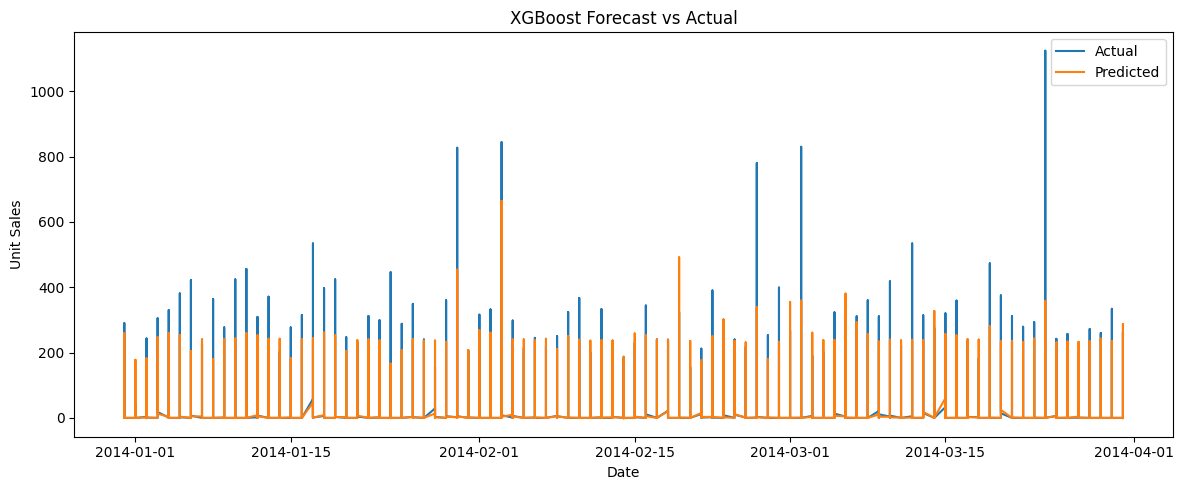

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 0) Make sure we have a DatetimeIndex named 'date'
if 'date' in df_train.columns:
    df_train['date'] = pd.to_datetime(df_train['date'], errors='coerce')
    df_train = df_train.set_index('date').sort_index()
else:
    # assume the index is (or should be) dates
    df_train.index = pd.to_datetime(df_train.index, errors='coerce')
    df_train = df_train.sort_index()
    df_train.index.name = 'date'

# --- 1) Define features/target
X = df_train.drop(columns=['unit_sales'])
y = df_train['unit_sales']

# --- 2) Time-ordered split (no shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# --- 3) Final model (use your best_params safely)
best_params = best_params  # assumed defined earlier
final_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=best_params.get("n_estimators", 150),
    max_depth=best_params.get("max_depth", 6),
    learning_rate=best_params.get("eta", 0.05),
    subsample=best_params.get("subsample", 1.0),
    colsample_bytree=best_params.get("colsample_bytree", 0.5),
    random_state=42,
)
final_model.fit(X_train, y_train)

# --- 4) Predict
y_pred = final_model.predict(X_test)

# --- 5) Metrics
def forecast_metrics(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    mask = y_true != 0
    mape = (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100 if mask.any() else np.nan
    denom = np.abs(y_true) + np.abs(y_pred)
    smape = (2*np.abs(y_pred - y_true) / np.where(denom==0, 1.0, denom)).mean() * 100
    naive = np.abs(np.diff(y_true)).mean() if len(y_true) > 1 else np.nan
    mase  = mae / naive if (naive is not np.nan and naive != 0) else np.nan
    return {"MAE": mae, "RMSE": rmse, "R2": r2, "MAPE": mape, "sMAPE": smape, "MASE": mase}

metrics = forecast_metrics(y_test, y_pred)
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")

# --- 6) Plot with date x-axis
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('XGBoost Forecast vs Actual')
plt.xlabel('Date'); plt.ylabel('Unit Sales'); plt.legend(); plt.tight_layout()
plt.show()

# **Evaluation the Tuned Model**

**1️⃣ Comparing the Metrics**

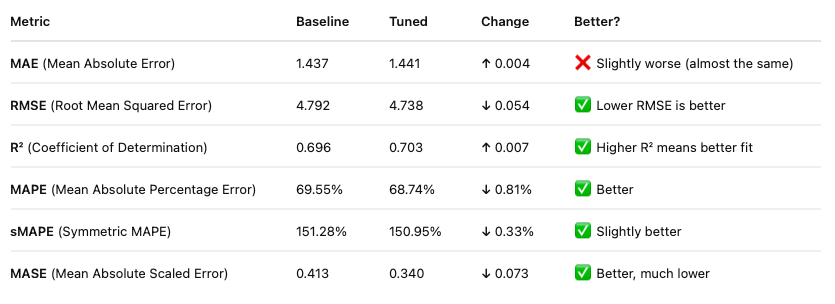

**2️⃣ What the changes mean**

•	RMSE improved slightly → tuned model is predicting closer to the actual values, and large errors are penalized less.

•	R² improved → The tuned model explains slightly more variance in the data.

•	MAPE & sMAPE improved → Percentage error dropped, so relative predictions are more accurate.

•	MASE dropped significantly → The tuned model is doing much better than a naive forecast (scaled error is smaller).

•	MAE essentially unchanged → On average, the absolute size of the errors stayed about the same.

**3️⃣ Why the improvement is small**

•	The baseline was already well-tuned by default.

•	Hyperparameter tuning fine-tuned tree depth, learning rate, and regularization, but improvements in well-optimized models tend to be incremental.

•	This is normal in forecasting tasks — going from “good” to “great” often yields only a few % gain.

**4️⃣ How to interpret**

•	The biggest gain is in MASE, which suggests the tuned model has reduced error compared to a naive approach more effectively.

•	RMSE improvement means fewer large mistakes — important in forecasting when large deviations are costly.

•	The model is slightly better across almost all metrics — so it’s worth keeping the tuned parameters.

# **Saving my Tuned Model**

In [18]:
import joblib
import json

# Save the tuned model in two formats
final_model.save_model("best_xgb_model.json")  # XGBoost native format
joblib.dump(final_model, "best_xgb_model.pkl")  # Pickle format

# Save the best parameters
with open("best_xgb_params.json", "w") as f:
    json.dump(best_params, f, indent=4)

print("✅ Model and parameters saved successfully!")

✅ Model and parameters saved successfully!


# **later loading my Tuned Model**

In [19]:
from xgboost import XGBRegressor
import joblib
import json

# Load from JSON (XGBoost native)
model_xgb = XGBRegressor()
model_xgb.load_model("best_xgb_model.json")

# Load from Pickle (sklearn-compatible)
model_pickle = joblib.load("best_xgb_model.pkl")

# Load best parameters
with open("best_xgb_params.json", "r") as f:
    best_params_loaded = json.load(f)

print("Loaded parameters:", best_params_loaded)

Loaded parameters: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 6, 'eta': 0.05, 'colsample_bytree': 0.5}



=== Store/Item Forecast Metrics ===
MAE: 0.965
RMSE: 1.735
R2: -0.476
MAPE: 43.900
sMAPE: 129.176
MASE: 0.903


/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_63955/2515455934.py:56: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_test_item = X_test_item[expected_feats].apply(pd.to_numeric, errors="ignore").fillna(0)


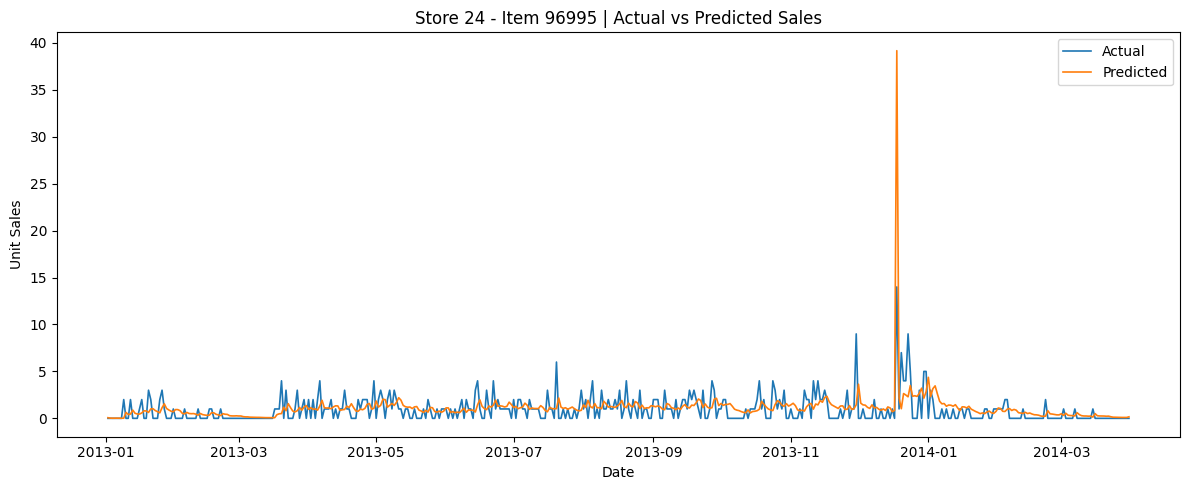

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- metric helper ---
def forecast_metrics(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    mask = y_true != 0
    mape = (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100 if mask.any() else np.nan
    denom = np.abs(y_true) + np.abs(y_pred)
    smape = (2 * np.abs(y_pred - y_true) / np.where(denom == 0, 1.0, denom)).mean() * 100
    naive = np.abs(np.diff(y_true)).mean() if len(y_true) > 1 else np.nan
    mase  = mae / naive if (naive not in [0, np.nan]) and naive != 0 else np.nan
    return {"MAE": mae, "RMSE": rmse, "R2": r2, "MAPE": mape, "sMAPE": smape, "MASE": mase}

# --- load data & model ---
df_train = pd.read_csv("feature_eng_upto_2014.csv")
model = joblib.load("best_xgb_model.pkl")

store_id = 24
item_id  = 96995

# Filter & sort
df_item = df_train[(df_train["store_nbr"] == store_id) & (df_train["item_nbr"] == item_id)].copy()
df_item["date"] = pd.to_datetime(df_item["date"])
df_item = df_item.sort_values("date")

# Target
y_test_item = df_item["unit_sales"].astype(float)

# Build X with EXACT training features
if not hasattr(model, "feature_names_in_"):
    raise RuntimeError("Model does not expose feature_names_in_. Save/fit with a recent xgboost/sklearn to use this.")

expected_feats = list(model.feature_names_in_)
X_test_item = df_item.copy()

# Create any missing expected columns
missing = [c for c in expected_feats if c not in X_test_item.columns]
for c in missing:
    # sensible defaults: ids from filter, zeros for engineered features
    if c == "store_nbr":
        X_test_item[c] = store_id
    elif c == "item_nbr":
        X_test_item[c] = item_id
    else:
        X_test_item[c] = 0

# Ensure all expected columns are numeric where appropriate
X_test_item = X_test_item[expected_feats].apply(pd.to_numeric, errors="ignore").fillna(0)

# Predict
y_pred_item = model.predict(X_test_item)

# Metrics
metrics = forecast_metrics(y_test_item, y_pred_item)
print("\n=== Store/Item Forecast Metrics ===")
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_item["date"], y_test_item, label="Actual", linewidth=1.2)
plt.plot(df_item["date"], y_pred_item, label="Predicted", linewidth=1.2)
plt.title(f"Store {store_id} - Item {item_id} | Actual vs Predicted Sales")
plt.xlabel("Date"); plt.ylabel("Unit Sales"); plt.legend(); plt.tight_layout(); plt.show()

In [3]:
# setting the file path - locally.
file_path = './data_store_sales/'
# Load the merged files into pandas DataFrames
df= pd.read_csv(file_path+'feature_eng_upto_2014.csv')

In [4]:
filtered_row = df[(df['date'] == '2014-03-01') & (df['item_nbr'] == 257847) & (df['store_nbr'] == 24)]
print(filtered_row)

       store_nbr  item_nbr        date  unit_sales  onpromotion  outlier  \
69885         24    257847  2014-03-01       175.0            0        0   

       dcoilwtico  is_holiday  is_event  dayofweek  ...  promo_last_week  \
69885       103.7           0         0          5  ...              0.0   

       oil_price_lag_3  oil_price_change  next_is_holiday  next_is_event  \
69885           102.93           0.00797                0              0   

       outlier_lag_1  outlier_lag_7  outlier_lag_14  outlier_lag_30  \
69885            0.0            0.0             0.0             0.0   

       outlier_rolling_mean_7  
69885                     0.0  

[1 rows x 44 columns]
